# K Nearest Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(
  n_samples = 1000, # 1000 obsevations
  n_features = 3, # total 3 features
  n_redundant = 1,
  n_classes = 2, # 2 classes (binary classification)
  random_state = 999
)


In [5]:
X

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       ...,
       [-0.75602574, -0.51816111, -2.20382324],
       [ 0.56066316, -0.07335845, -2.15660348],
       [-1.87521902, -1.11380394, -4.04620773]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.906060606060606
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       169
           1       0.93      0.88      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

Confusion Matrix:
 [[158  11]
 [ 20 141]]


In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {'n_neighbors': list(range(1,11))}

In [18]:
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best k value
print("Best k value:", grid_search.best_params_['n_neighbors'])
print("Best Cross-Validation Score:", grid_search.best_score_)

Best k value: 9
Best Cross-Validation Score: 0.9029850746268657


In [19]:
# Use the best model to predict on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


In [20]:
# Print performance on the test set
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred))


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



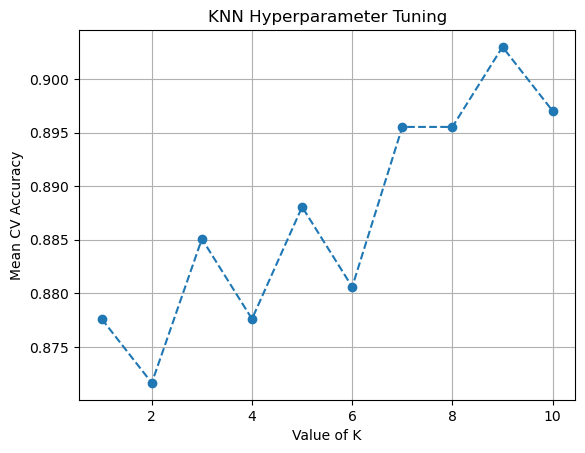

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
plt.plot(param_grid['n_neighbors'], results['mean_test_score'], marker='o', linestyle='--')
plt.xlabel('Value of K')
plt.ylabel('Mean CV Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.grid(True)
plt.show()